In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip, cPickle

from collections import namedtuple

In [6]:
files = glob.glob('../results/a4-Apr3/e*') 

In [7]:
files, len(files)

(['../results/a4-Apr3/errors0.pkl.gz',
  '../results/a4-Apr3/errors4.pkl.gz',
  '../results/a4-Apr3/errors8.pkl.gz',
  '../results/a4-Apr3/errors10.pkl.gz',
  '../results/a4-Apr3/errors3.pkl.gz',
  '../results/a4-Apr3/errors5.pkl.gz',
  '../results/a4-Apr3/errors1.pkl.gz',
  '../results/a4-Apr3/errors2.pkl.gz',
  '../results/a4-Apr3/errors9.pkl.gz',
  '../results/a4-Apr3/errors6.pkl.gz',
  '../results/a4-Apr3/errors14.pkl.gz',
  '../results/a4-Apr3/errors13.pkl.gz',
  '../results/a4-Apr3/errors120.pkl.gz',
  '../results/a4-Apr3/errors16.pkl.gz',
  '../results/a4-Apr3/errors157.pkl.gz',
  '../results/a4-Apr3/errors153.pkl.gz',
  '../results/a4-Apr3/errors158.pkl.gz',
  '../results/a4-Apr3/errors17.pkl.gz',
  '../results/a4-Apr3/errors166.pkl.gz',
  '../results/a4-Apr3/errors107.pkl.gz',
  '../results/a4-Apr3/errors18.pkl.gz',
  '../results/a4-Apr3/errors15.pkl.gz',
  '../results/a4-Apr3/errors19.pkl.gz',
  '../results/a4-Apr3/errors24.pkl.gz',
  '../results/a4-Apr3/errors22.pkl.gz',
  '

In [8]:
ex_list = []
for filename in files:
    ex = []
    ex.append(filename)
    with gzip.open(filename, "r") as f:
        with gzip.open(filename.replace('errors', 'params'), 'r') as f_param:
            errors = cPickle.load(f)
            params = cPickle.load(f_param)
            ex.extend(errors)
            ex.extend(params)
        
    ex_list.append(ex)

In [9]:
for ex in ex_list:
    if np.isnan(ex[6]):
        ex[6] = 0.005
        ex[7] = 0.005
        ex[8] = 0.005
        ex[9] = 0.005

In [10]:
list(enumerate(ex_list[0]))

[(0, '../results/a4-Apr3/errors0.pkl.gz'),
 (1, array([ 0.00641267,  0.00888551,  0.00478042,  0.00354369,  0.00185102,
          0.00068856,  0.00050693,  0.00038985,  0.00030312,  0.00025515,
          0.0002504 ,  0.00024557])),
 (2, array([  4.86619049e+02,   1.15762893e-02,   6.24392461e-03,
           4.74122586e-03,   2.51331064e-03,   1.00165489e-03,
           8.36870691e-04,   6.62278791e-04,   5.70341421e-04,
           4.94055159e-04,   4.77676222e-04,   4.52365872e-04])),
 (3, 62.28920388221741),
 (4, 0.00022890515),
 (5, 0.00045236593),
 (6, 0.0002759269),
 (7, 0.00055585091),
 (8, 0.00034966777),
 (9, 0.0006307307),
 (10, 90.51828950350033),
 (11, 7.84514564649546e-06),
 (12, [0.70001547044947121, 0.81000868805697868]),
 (13, 0.03168760234400791),
 (14, 0.43045127787065374),
 (15, ['relu', 'relu'])]

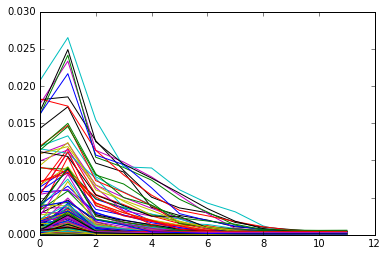

In [11]:
for i, ex in enumerate(ex_list):
    plt.plot(ex[1], label=str(i))

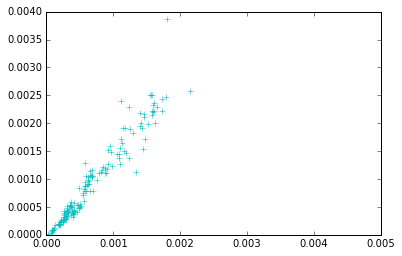

In [16]:
plt.plot([ex[6] for ex in ex_list], [ex[7] - ex[6] for ex in ex_list], "c+")

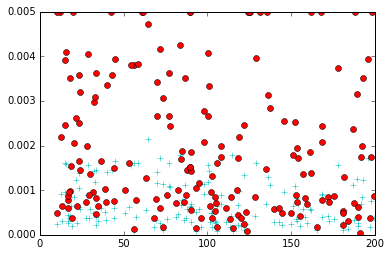

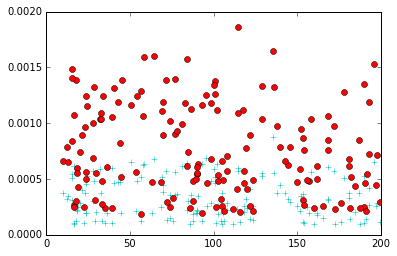

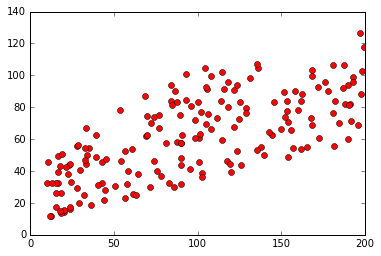

In [15]:
# べつに100で足りてる
plt.plot([ex[10] for ex in ex_list], [ex[6] for ex in ex_list], 'c+')
plt.plot([ex[10] for ex in ex_list], [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[8] for ex in ex_list], 'c+')
plt.plot([ex[10] for ex in ex_list], [ex[9] for ex in ex_list], 'ro')
plt.ylim(0., 0.002)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[3] for ex in ex_list], 'ro')

plt.figure()

(0, 0.005)

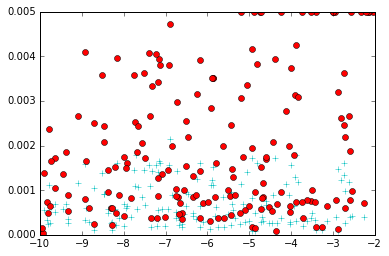

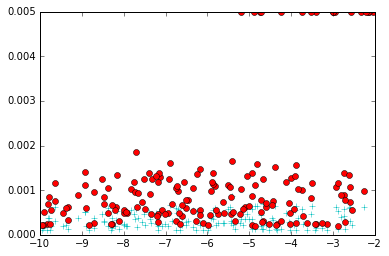

In [19]:
# l2 じゃあ低いほうがいい なくていいでしょ
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[6] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[8] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[9] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)

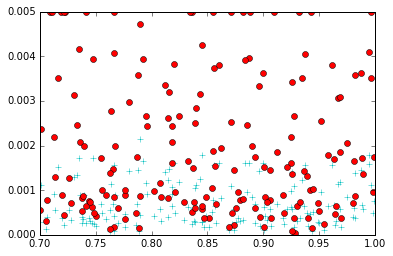

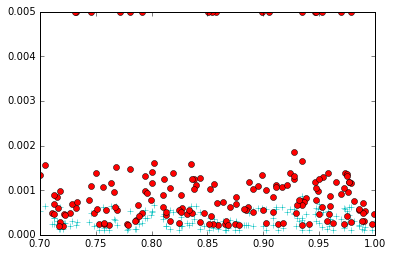

In [22]:
# dropout やっぱ0.9くらい
plt.plot([ex[12][0] for ex in ex_list], [ex[6] for ex in ex_list], 'c+')
plt.plot([ex[12][0] for ex in ex_list], [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()
plt.plot([ex[12][1] for ex in ex_list], [ex[8] for ex in ex_list], 'c+')
plt.plot([ex[12][1] for ex in ex_list], [ex[9] for ex in ex_list], 'ro')
plt.ylim(0, 0.005)
plt.figure()

(0, 0.01)

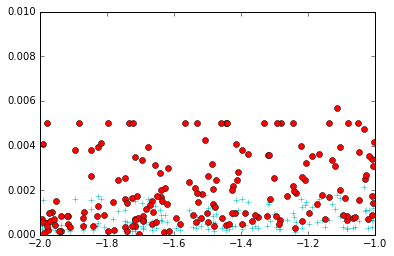

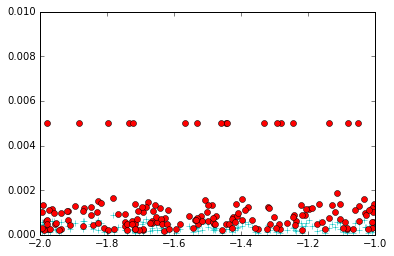

In [26]:
# gamma_scale 小さいほうがいい 10**-2
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[6] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.01)
plt.figure()
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[8] for ex in ex_list], 'c+')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[9] for ex in ex_list], 'ro')
plt.ylim(0, 0.01)

(0, 0.01)

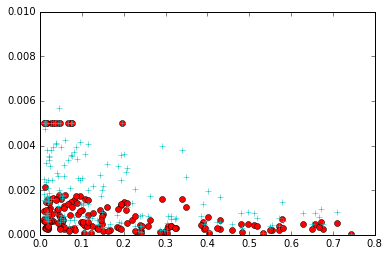

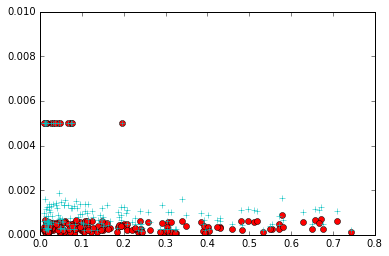

In [29]:
# bias_scale 
plt.plot([ex[14] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[14] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)
plt.figure()
plt.plot([ex[14] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[14] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)

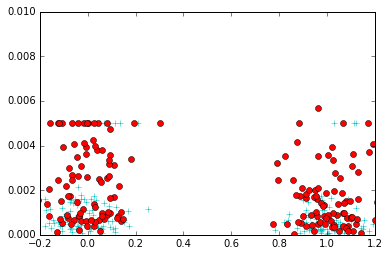

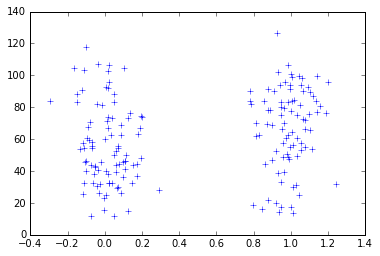

In [28]:
# leaky-relu is slitely better
plt.plot([int(ex[15] == ['relu', 'relu'])+0.1*np.random.randn() for ex in ex_list], [ex[6] for ex in ex_list], 'c+')
plt.plot([int(ex[15] == ['relu', 'relu']) +0.1*np.random.randn() for ex in ex_list], [ex[7] for ex in ex_list], 'ro')
plt.ylim(0, 0.01)
plt.xlim(-0.2, 1.2)
plt.figure()
plt.plot([int(ex[15] == ['relu', 'relu']) +0.1*np.random.randn() for ex in ex_list], [ex[3] for ex in ex_list], '+')
